In [1]:
%reset -f

In [2]:
#!/usr/bin/env python3
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import torch
from torch import nn
from torch.utils.data import DataLoader
from torcheval.metrics import BinaryAccuracy
from torcheval.metrics.functional import binary_accuracy
torch.manual_seed(18)
torch.cuda.is_available()
from DiscriminatorV3 import DiscriminatorV3, ConvBlock
from DiscriminatorV4 import DiscriminatorV4, ConvBlock
from FacesDataset import FacesDataset

In [3]:
training_set = FacesDataset('datasets/train.csv')

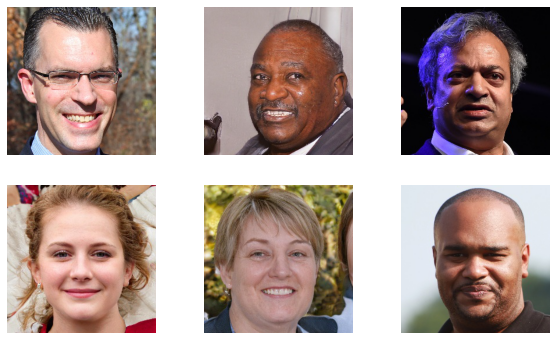

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Read CSV file
df = pd.read_csv('datasets/train.csv')

# Select 6 random images
sample_df = df.sample(n=6, random_state=1)

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and plot images
for i, axi in enumerate(ax.flat):
    path = sample_df.iloc[i]['path']
    img = Image.open(path)
    axi.imshow(img)
    axi.set_axis_off()

# Show the figure
plt.show()

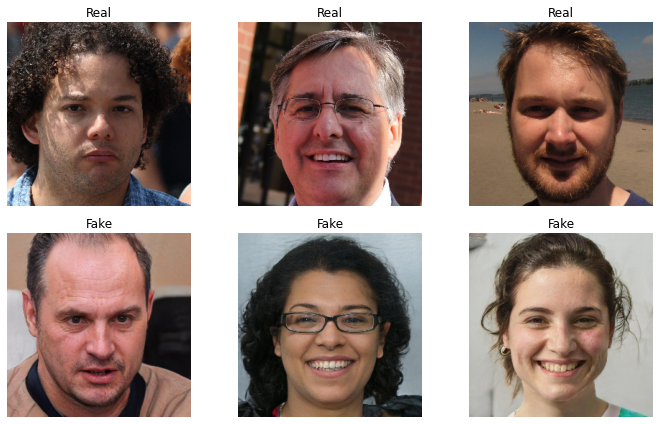

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/train.csv')

real_images = df[df['label'] == 1].sample(3)['path'].tolist()
fake_images = df[df['label'] == 0].sample(3)['path'].tolist()

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()

for i in range(6):
    if i < 3:
        img_path = real_images[i]
        title = 'Real'
    else:
        img_path = fake_images[i-3]
        title = 'Fake'
    
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

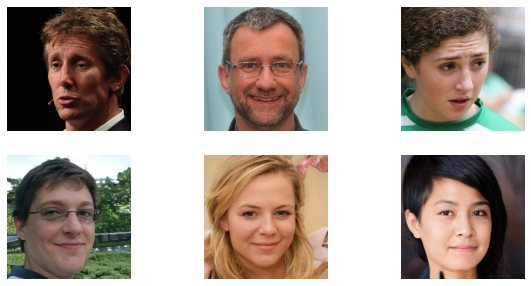

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv('datasets/train.csv')

real_images = df[df['label'] == 1].sample(3)
fake_images = df[df['label'] == 0].sample(3)

fig, axs = plt.subplots(2, 3, figsize=(10, 5))

for i, (idx, row) in enumerate(real_images.iterrows()):
    img = Image.open(row['path'])
    axs[0, i].imshow(img)
    axs[0, i].axis('off')

for i, (idx, row) in enumerate(fake_images.iterrows()):
    img = Image.open(row['path'])
    axs[1, i].imshow(img)
    axs[1, i].axis('off')

plt.show()